# **Support Vector Machines**
SVM, is a powerful and verstile machine learning model used for linear/non-linear classification,regression and even novelty detection.

It works well for small to medium-sized nonlinear datasets(i.e. hundreds to thousands of instances),especially for classification tasks

## **Linear SVM Classification**
Linearly seperable dataset, is one in which two classes can be separated using a straight line. In SVM instead of finding a seperating line we want find the largest seperating margin.

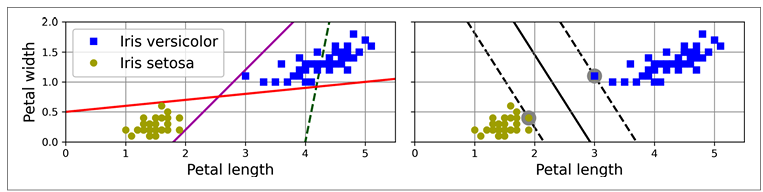

As the left image shows we can find several straight lines which seperate the two classes but there are several instances which lie very close to the line so if we were to add more training instances slightly different it will not work, on the othe hand in the right image along the seperating line there is a wide margin in case of addition of new instance off the street it will not affect the decision boundary at all. These dotted lines are support vectors.

!! SVM are sensitive to feature scales

### Soft-margin Classification
If we strictly impose that all instances must be off the street and on the correct side, it will be hard margin classification. There are two issues with it:
1) Dataset should be linearly seperable
2) It is sensitive to outliers, will not generalize well

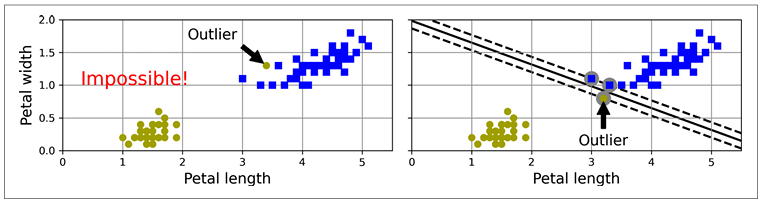

To avoid the above outcomes there is a solution, the soft-margin classification whose objective is to find the balance between finding the widest margin and limit the margin violations. This balance can be controlled using the regularization hyperparameter, smaller the variable wider the margin but more violations and vice versa.

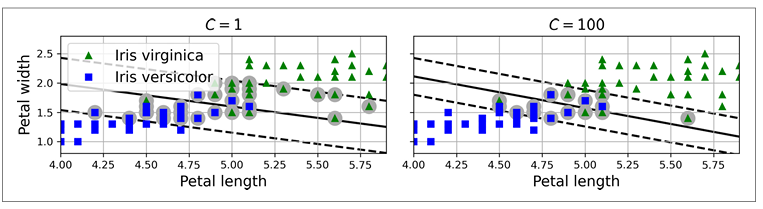

If the SVM classifier overfits reduce C

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [2]:
X_new = [[5.5,1.7],[5.0,1.5]]
print(svm_clf.predict(X_new))

[ True False]


we can use decision_function() to get the signed distance between the decision boundary and the instance

In [3]:
print(svm_clf.decision_function(X_new))

[ 0.66163816 -0.22035761]


LinearSVC() doesn't hase predict_prba() method. But for the SVC method if one sets the probability hyperparameter to True, then model will fit an extra model to fit the SVM decision function scores to estimated probabilities. It will slow down the model but will allow the methods predict_proba() and predict_log_proba()

## **Non-Linear SVM Classification**
SVM works very well on Linearly seperable dataset but almost all real world datasets are non-linear. We can modify the datasets to be linearly seperable and apply SVM on it.

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),StandardScaler(),LinearSVC(C=10,max_iter=10_000,random_state=42))
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

>Polynomial Kernel: although using the polynomial kernel seems useful but low level polynomial cannot deal with complex datasets and with high polynomial degrees it creates a huge number of features and makes the algorithm slow. SVM, has a trick known as the kernel for this.

In [5]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly",C=5,degree=3,coef0=1))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

coef0 controls how much the model is affected by the low-degree vs high-degree terms

Another technique to tackle nonlinear probles is to add feature computed using a similarity function, which measures how much each instance resembles a particular landmark and based on that transform the dataset to a linearly seperable dataset

>Gaussian RBF Kernel: similarity feature technique works for many problems but may be computationally expensive but SVM has another kernel for that as well

In [6]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="rbf",gamma=0.5,C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=0.5))])

gamma, is the parameter that defines the smoothness of the decision boundary. Increasing the gamma value makes the bell-shaped curve narrower.

!! If model is overfitting reduce gamma and vice versa

> LinearSVC is faster than SVC(kernel="linear") in case of very large training set. If it is not too large try using different kernels if large computing power use hyperparameter search

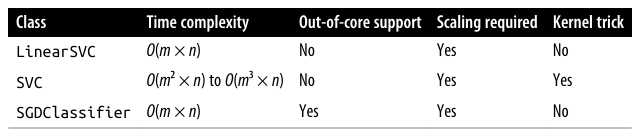

LinearSVC is optimized for Linear SVMs

SVC is optimized for the kernel trick is best for small or medium-sized nonlinear datasets, It scales with the number of features

SGDClassifier performs large margin classification by default its hyperparameters can be adjusted to produce similar results to linear SVMs, scales very well, allows incremental learning so can be used to train a model on large dataset that doesnt' fit in the RAM (out-of-core learning)

## **SVM Regression**
Instead of trying to find the widest margin between two classes, for regression we will try to fit as many instances as possible on the margin trying to limit the margin violations(instances of the margin). The width of the street is controlled by the hyperparameter epsilon. 

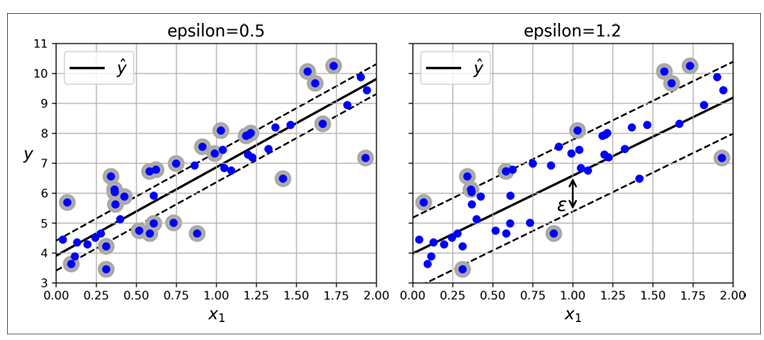

Reducing 𝜖leads to more support vectors because the tolerance for error becomes smaller, which increases the regularization of the model.

Training instances that fall within the ϵ-margin don't affect the model’s predictions, making the model ϵ-insensitive to those instances. This characteristic makes the model more robust to small errors in predictions or noise in the data.

from sklearn.svm import LinearSVR
X,y = [...]   #Linearly Seperable dataset
svm_reg = make_pipeline(StandardScaler(),LinearSVR(epsilon=0.5,random_state=42))
svm_reg.fit(X,y)

To tackle nonlinear regression tasks, similar to the classification we have SVR class which supports the kernel trick

from sklearn.svm import SVR
X,y = [...]  #a quadratic dataset
svm_poly_reg = make_pipeline(StandardScaler(),SVR(kernel="poly",degree=2,C=0.01,epsilon=0.1))
svm_poly_reg.fit(X,y)

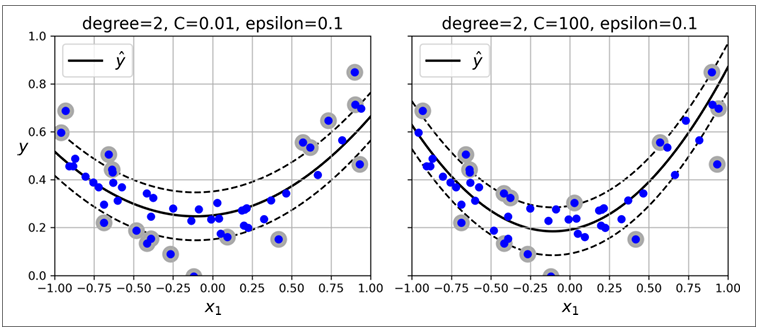

# Support Vector Machines (SVMs), Duality, and Kernel Trick

## 1. Support Vector Machines (SVMs)
### **Goal of SVM:**
- SVMs are supervised learning models for classification.
- They aim to find a decision boundary (**hyperplane**) that **maximizes the margin** between two classes in the feature space.
- The margin is defined as the distance between the hyperplane and the nearest points from each class (called **support vectors**).

### **Optimization Problem:**
- SVM minimizes the objective:
  \[
  \frac{1}{2} \|w\|^2
  \]
  subject to \( y_i(w^T x_i + b) \geq 1 \), where:
  - \( w \): weight vector of the hyperplane.
  - \( b \): bias term.
  - \( y_i \): class label (\( \pm 1 \)).
  - \( x_i \): feature vector.

### **Intuition:**
- Imagine stretching a rubber band between the two classes. The optimal hyperplane lies where the rubber band is stretched the most, i.e., the farthest from both classes but still touching them at the **support vectors**.

---

## 2. Duality in SVM
### **What is Duality?**
- Many optimization problems can be expressed in two forms:
  - **Primal Form**: Works with direct variables (e.g., weights \( w \), bias \( b \)).
  - **Dual Form**: Reframes the problem in terms of **Lagrange multipliers** \( \alpha_i \), which measure the importance of each data point.

### **Dual Form for SVM:**
- The dual reformulation maximizes:
  \[
  \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i^T x_j
  \]
  subject to:
  - \( \alpha_i \geq 0 \)
  - \( \sum_i \alpha_i y_i = 0 \)
- Here, \( \alpha_i \) are non-zero only for the **support vectors** (relevant points).

### **Intuition:**
- In the dual form, we don’t explicitly calculate \( w \). Instead, the solution depends only on the **dot products** between feature vectors, which is computationally advantageous.

---

## 3. Kernel Trick
### **Challenge with Non-Linear Data:**
- In real-world scenarios, data is often not linearly separable.
- To separate such data, we can transform it into a higher-dimensional space where a linear boundary becomes feasible.

### **Kernel Trick:**
- Instead of computing the transformation explicitly (which can be computationally expensive), the **kernel function** computes the dot product in the higher-dimensional space directly:
  \[
  K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
  \]

- Examples of kernel functions:
  - **Linear Kernel**: \( K(x_i, x_j) = x_i^T x_j \)
  - **Polynomial Kernel**: \( K(x_i, x_j) = (x_i^T x_j + c)^d \)
  - **Gaussian (RBF) Kernel**: \( K(x_i, x_j) = \exp(-\|x_i - x_j\|^2 / 2\sigma^2) \)

### **Intuition:**
- The kernel is a "shortcut" that avoids explicitly computing complex transformations. For example, rather than drawing an actual 3D surface, the kernel mathematically simulates it to distinguish the classes.

---

## Key Insights:
1. **Why SVM works well:**
   - It focuses only on the most critical data points (**support vectors**) and ignores the rest.
   - This makes it robust to noise and overfitting, especially in high-dimensional spaces.

2. **Why duality is useful:**
   - The dual form allows leveraging **kernels**, which depend on pairwise data comparisons, rather than directly solving for \( w \) and \( b \).

3. **Why the kernel trick is powerful:**
   - It makes SVMs applicable to **non-linear problems** without computationally expensive transformations.


 
## **Exercise**
1) What is a support vector?

What is the fundamental idea behind support vector machines?

Why is it important to scale the inputs when using SVMs?

Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

How can you choose between LinearSVC, SVC, and SGDClassifier?

Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

What does it mean for a model to be ϵ-insensitive?

What is the point of using the kernel trick?

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 
different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary 
classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load 
using sklearn.datasets.fetch_california_housing().The targets represent hundreds of thousands of dollars. Since there are over20,000 instances, SVMs can be slow, so for
hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE